In [71]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import register_matplotlib_converters
from pandas.tseries.offsets import MonthEnd
from scipy.stats import iqr, pearsonr, spearmanr
import seaborn as sns

plt.style.use('fivethirtyeight')
register_matplotlib_converters()

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
#     r, _ = spearmanr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

In [69]:
df = pd.read_csv("./input/features.csv").replace("-", np.nan).astype(float)
df.head()

,label-denoise,label,y0,D0,D1,D2,D3,D4,D5,D6,...,D64,D65,D66,D67,D68,D69,D70,D71,D72,D73
0,2.635324,2.890372,2.239363,2.302585,2.079442,2.639057,2.079442,2.484907,2.564949,2.197225,...,5.200000,5.000000,4.35,4.1250,4.392857,4.150000,0.226504,0.236416,0.235231,0.220912
1,2.737134,3.218876,2.361431,2.708050,2.302585,2.079442,2.639057,2.079442,2.484907,2.564949,...,4.658333,6.250000,5.75,5.4375,5.928571,5.441667,0.217676,0.226504,0.236416,0.235231
2,2.712340,2.484907,2.383728,2.397895,2.708050,2.302585,2.079442,2.639057,2.079442,2.484907,...,3.833333,5.083333,5.30,4.9375,5.000000,4.933333,0.213775,0.217676,0.226504,0.236416
3,2.794296,3.135494,2.415693,2.484907,2.397895,2.708050,2.302585,2.079442,2.639057,2.079442,...,3.041667,4.583333,5.40,5.0000,4.928571,4.908333,0.217902,0.213775,0.217676,0.226504
4,2.856475,3.044522,2.474147,3.091042,2.484907,2.397895,2.708050,2.302585,2.079442,2.639057,...,2.333333,4.666667,5.45,5.4375,4.964286,5.200000,0.214275,0.217902,0.213775,0.217676


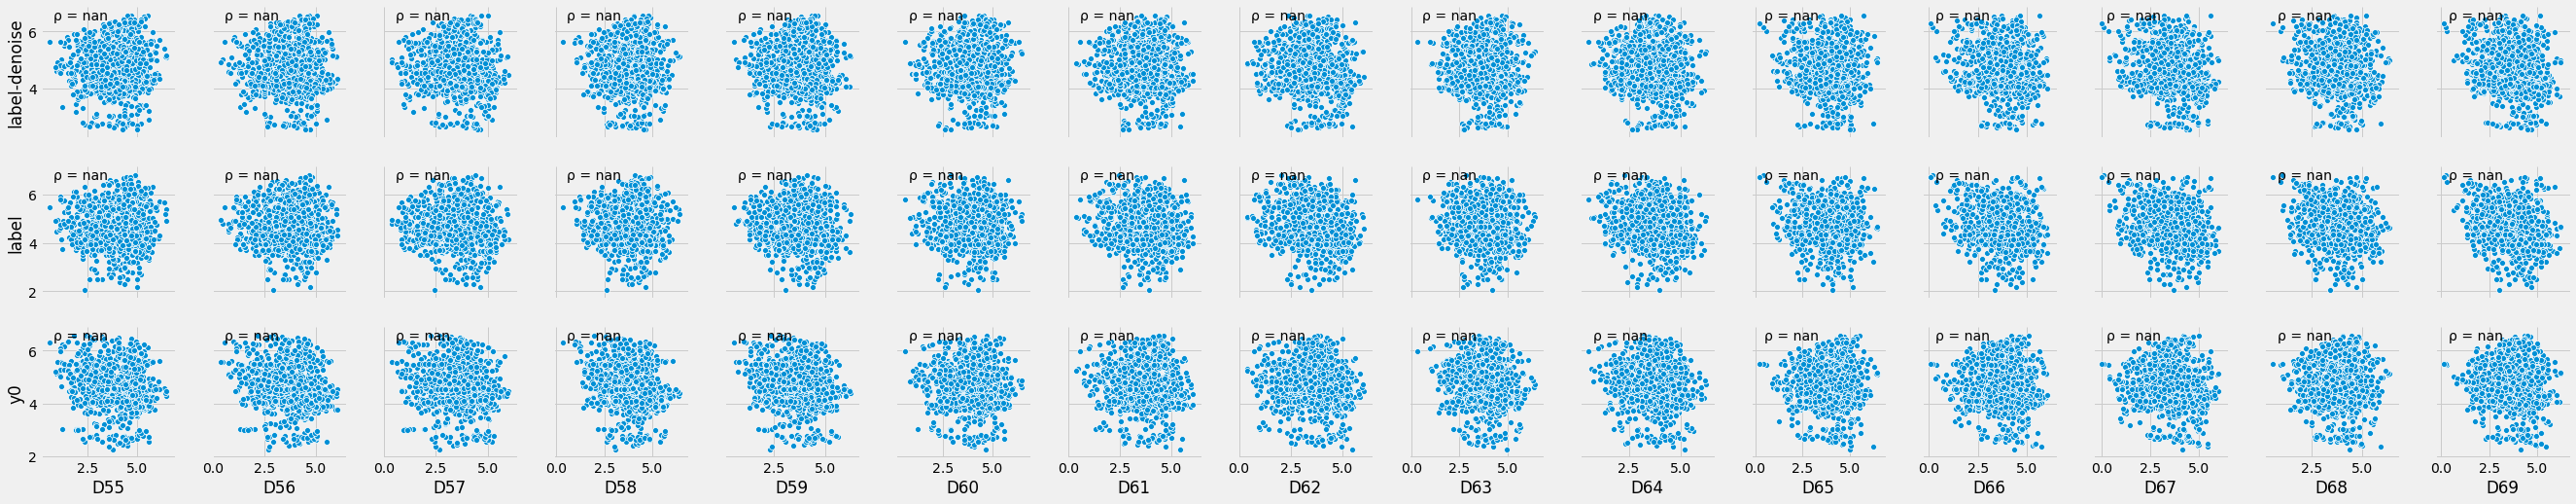

In [73]:
# sns.pairplot(df, x_vars=["Bool", "T-3-Bool"], y_vars=["label-denoise", "label"], dropna=True)
# sns.pairplot(df)
g = sns.pairplot(df, x_vars="D55	D56	D57	D58	D59	D60	D61	D62	D63	D64	D65	D66	D67	D68	D69".split("	"),
                 y_vars=["label-denoise", "label", "y0"])
g.map(corrfunc)
plt.show()